<a href="https://colab.research.google.com/github/iamsauravsharma/insincere-question-classification/blob/bishal/preprocessing_acording_to%20GNU%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bishalgaire360","key":"69b39489849cd899eaa93339bad30cdb"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c quora-insincere-questions-classification
from zipfile import ZipFile
file_name="train.csv.zip"
#file_name="embeddings.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')
file_name="embeddings.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

 96% 52.0M/54.4M [00:00<00:00, 63.5MB/s]
100% 54.4M/54.4M [00:00<00:00, 108MB/s] 
100% 5.96G/5.96G [00:44<00:00, 227MB/s]
100% 5.96G/5.96G [00:44<00:00, 145MB/s]
  0% 0.00/4.08M [00:00<?, ?B/s]
100% 4.08M/4.08M [00:00<00:00, 67.4MB/s]
 51% 8.00M/15.7M [00:00<00:00, 83.5MB/s]
100% 15.7M/15.7M [00:00<00:00, 100MB/s] 
Done
Done


In [5]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
df=pd.read_csv('train.csv')
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [0]:
def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [0]:
sentences = df["question_text"].progress_apply(lambda x: x.split()).values
vocab = build_vocab(sentences)

100%|██████████| 1306122/1306122 [00:06<00:00, 197634.53it/s]


In [0]:
len(vocab)

508823

In [0]:
vocab

{'How': 261930,
 'did': 33489,
 'Quebec': 97,
 'nationalists': 91,
 'see': 9003,
 'their': 34810,
 'province': 124,
 'as': 55047,
 'a': 402682,
 'nation': 780,
 'in': 363131,
 'the': 653948,
 '1960s?': 56,
 'Do': 40041,
 'you': 186436,
 'have': 83239,
 'an': 66779,
 'adopted': 298,
 'dog,': 81,
 'how': 25842,
 'would': 51374,
 'encourage': 386,
 'people': 48317,
 'to': 403183,
 'adopt': 445,
 'and': 251973,
 'not': 41901,
 'shop?': 176,
 'Why': 142291,
 'does': 62725,
 'velocity': 617,
 'affect': 4387,
 'time?': 5716,
 'Does': 23180,
 'space': 2146,
 'geometry?': 82,
 'Otto': 49,
 'von': 83,
 'Guericke': 3,
 'used': 12288,
 'Magdeburg': 2,
 'hemispheres?': 4,
 'Can': 52698,
 'I': 306261,
 'convert': 1514,
 'montra': 2,
 'helicon': 1,
 'D': 309,
 'mountain': 290,
 'bike': 793,
 'by': 41802,
 'just': 16039,
 'changing': 1030,
 'tyres?': 22,
 'Is': 108887,
 'Gaza': 65,
 'slowly': 271,
 'becoming': 2261,
 'Auschwitz,': 4,
 'Dachau': 4,
 'or': 89989,
 'Treblinka': 1,
 'for': 196491,
 'Pales

In [0]:
from gensim.models import KeyedVectors
emb_file ="GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin"
embeddings_index = KeyedVectors.load_word2vec_format(emb_file, binary=True)


In [0]:
import operator 

def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

In [0]:
oov = check_coverage(vocab,embeddings_index)
#this is of google news vector embedding

100%|██████████| 508823/508823 [00:01<00:00, 307099.79it/s]


Found embeddings for 24.31% of vocab
Found embeddings for  78.75% of all text


In [0]:
len(oov)

385136

In [6]:
from tqdm import tqdm_notebook
import numpy as np
emb_file = "glove.840B.300d/glove.840B.300d.txt"
#emb_file ="GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin"
glove_dic = {}
for line in tqdm_notebook(open(emb_file)):
    temp = line.split(" ")
    glove_dic[temp[0]] = np.asarray(temp[1:],dtype='float32')

In [0]:
oov = check_coverage(vocab,glove_dic)
#this is of gloab

100%|██████████| 508823/508823 [00:00<00:00, 615732.66it/s]


Found embeddings for 33.16% of vocab
Found embeddings for  88.16% of all text


In [0]:
len(oov)

340104

In [0]:
emb_file="paragram_300_sl999/paragram_300_sl999.txt"
glove_dic = {}
for line in tqdm_notebook(open(emb_file,encoding="utf8", errors='ignore')):
    temp = line.split(" ")
    glove_dic[temp[0]] = np.asarray(temp[1:],dtype='float32')

In [0]:
oov = check_coverage(vocab,glove_dic)
#this is of paragram

100%|██████████| 508823/508823 [00:00<00:00, 572129.28it/s]


Found embeddings for 19.59% of vocab
Found embeddings for  72.21% of all text


In [0]:
len(oov)

409124

In [0]:
del embeddings_index

In [0]:
len(oov)

340104

In [0]:
"?" in glove_dic

True

In [0]:
"!" in glove_dic

True

In [0]:
"," in glove_dic

True

In [0]:
'&' in glove_dic

True

In [0]:
"^" in glove_dic

True

In [0]:
"/" in glove_dic

True

In [0]:
"to" in glove_dic

True

In [0]:
"1025" in glove_dic

True

In [0]:
len(glove_dic)

2196016

In [0]:
oov

[('India?', 16384),
 ('it?', 12900),
 ("What's", 12425),
 ('do?', 8753),
 ('life?', 7753),
 ('you?', 6295),
 ('me?', 6202),
 ('them?', 6140),
 ('time?', 5716),
 ('world?', 5386),
 ('people?', 4971),
 ('why?', 4943),
 ('Quora?', 4655),
 ('like?', 4487),
 ('for?', 4450),
 ('work?', 4206),
 ('2017?', 4050),
 ('mean?', 3971),
 ('2018?', 3594),
 ('country?', 3422),
 ('now?', 3354),
 ('this?', 3340),
 ('years?', 3237),
 ('not?', 3114),
 ('year?', 2790),
 ('day?', 2680),
 ('person?', 2617),
 ('engineering?', 2599),
 ('school?', 2585),
 ('so,', 2562),
 ('I’m', 2506),
 ('money?', 2464),
 ('system?', 2444),
 ("you've", 2418),
 ('Why?', 2405),
 ('today?', 2404),
 ('China?', 2392),
 ('be?', 2391),
 ('job?', 2354),
 ('business?', 2284),
 ("isn't", 2276),
 ('company?', 2240),
 ('"The', 2239),
 ('online?', 2200),
 ('him?', 2196),
 ('exam?', 2175),
 ('US?', 2114),
 ('don’t', 2089),
 ('Canada?', 2064),
 ('countries?', 2055),
 ('out?', 2012),
 ('that?', 1989),
 ('future?', 1952),
 ('women?', 1949),
 ('s

In [0]:
"adult" in glove_dic

True

In [0]:
def clean_text(x):

    x = str(x)
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    return x

In [0]:
x="adult?"
clean_text(x)

'adult'

In [0]:
"dangerous?" in glove_dic

False

In [8]:
df["question_text"] = df["question_text"].progress_apply(lambda x: clean_text(x))

100%|██████████| 1306122/1306122 [00:12<00:00, 105146.71it/s]


In [0]:
sentences = df["question_text"].apply(lambda x: x.split())
vocab = build_vocab(sentences)
len(vocab)

100%|██████████| 1306122/1306122 [00:06<00:00, 216419.16it/s]


253623

After removing the symbol like question mark etc ,we compare vocab and embedding

In [0]:
oov = check_coverage(vocab,glove_dic)

100%|██████████| 253623/253623 [00:00<00:00, 650591.23it/s]


Found embeddings for 71.38% of vocab
Found embeddings for  99.44% of all text


Eailier embedding for 33.16% of  vocab

embedding for 88.16% for all the text

and len(oov ) was 340104

In [0]:
dfhead()

NameError: ignored

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import gensim as gn
from tqdm import tqdm_notebook

from keras.layers import LSTM,Bidirectional,TimeDistributed, Embedding,Dense,Input,GlobalMaxPool1D,Flatten,Dropout
from keras.layers import CuDNNLSTM,CuDNNGRU
from keras.models import Sequential,Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.optimizers import Adam
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

Using TensorFlow backend.


In [0]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)
        
    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True
        
    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)
    def compute_output_shape(self, input_shape):
        return input_shape[0], self.features_dim

In [0]:
del df['qid']

In [0]:
train, val = train_test_split(df, test_size=0.1, random_state=42)

In [0]:
n_words = 50000
tokenizer = Tokenizer(num_words=n_words)
tokenizer.fit_on_texts(list(train.question_text))

q_train = tokenizer.texts_to_sequences(train.question_text)
q_val = tokenizer.texts_to_sequences(val.question_text)
#q_test = tokenizer.texts_to_sequences(df_test.question_text)

max_len = 100
q_train = pad_sequences(q_train,maxlen=max_len)
q_val = pad_sequences(q_val,maxlen=max_len)
#q_test = pad_sequences(q_test,maxlen=max_len)

y_train = train.target
y_val = val.target

del train,val,df

In [0]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#find the best threshold
def optim_thres(y_val,y_pred):
    score = 0
    thresholds = np.arange(0.1,0.501,0.01)
    for thres in thresholds:
        thres = np.round(thres,2)
        temp_pred = (y_pred > thres).astype(int)
        temp_score = f1_score(y_val,temp_pred)
        print("Thres: {} --------- F1: {}".format(thres,temp_score))
        if temp_score > score:
            score = temp_score
            final_thres = thres
    return final_thres

In [0]:
word_index = tokenizer.word_index
emb_size = glove_dic['.'].shape[0]
emb_matrix = np.zeros((n_words,emb_size))
for w,index in word_index.items():
    if index >= n_words:
        continue
    vec = glove_dic.get(w)
    if vec is not None:
        emb_matrix[index,:] = vec

100%|██████████| 210229/210229 [00:00<00:00, 641831.16it/s]

Found embeddings for 59.87% of vocab
Found embeddings for  99.21% of all text


In [22]:
inp = Input(shape=(max_len,))
x = Embedding(input_dim=n_words,output_dim=emb_size, weights=[emb_matrix])(inp)
#x = Embedding(input_dim=n_words,output_dim=embed_size, weights=[embedding_matrix])(inp)
#x = Bidirectional(CuDNNLSTM(100, return_sequences=True))(x)
x = Bidirectional(CuDNNLSTM(100, return_sequences=True))(x)
x =  Bidirectional(CuDNNGRU(100,return_sequences=True))(x)
x = Attention(step_dim=max_len)(x)
x = Dense(36,activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inp,output=x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 100, 300)          15000000  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 200)          321600    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 200)          181200    
_________________________________________________________________
attention_2 (Attention)      (None, 200)               300       
_________________________________________________________________
dense_3 (Dense)              (None, 36)                7236      
_________________________________________________________________
dropout_2 (Dropout)          (None, 36)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [20]:
model_name = 'lstm_glove_emb'
checkpoint = ModelCheckpoint(filepath='./{}.hdf5'.format(model_name),
                             monitor='val_f1',mode='max',verbose=1,
                            save_best_only=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1])
history  = model.fit(q_train,y_train,batch_size=1500,epochs=7,
                     validation_data=(q_val,y_val),verbose=1,callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 1175509 samples, validate on 130613 samples
Epoch 1/7
1175509/1175509 [==============================] - 136s 116us/step - loss: 0.1228 - acc: 0.9538 - f1: 0.5612 - val_loss: 0.1003 - val_acc: 0.9600 - val_f1: 0.6092

Epoch 00001: val_f1 improved from -inf to 0.60915, saving model to ./lstm_glove_emb.hdf5
Epoch 2/7
1175509/1175509 [==============================] - 132s 113us/step - loss: 0.0973 - acc: 0.9611 - f1: 0.6603 - val_loss: 0.0988 - val_acc: 0.9604 - val_f1: 0.6599

Epoch 00002: val_f1 improved from 0.60915 to 0.65994, saving model to ./lstm_glove_emb.hdf5
Epoch 3/7
1175509/1175509 [==============================] - 132s 113us/step - loss: 0.0877 - acc: 0.9648 - f1: 0.7018 - val_loss: 0.0997 - val_acc: 0.9609 - val_f1: 0.6500

Epoch 00003: val_f1 did not improve from 0.65994
Epoch 4/7
1175509/1175509 [==============================] - 132s 113us/step - loss: 0.0773 - acc: 0.9692 - f1: 0.7443 - val_loss: 0.1072 - val_acc

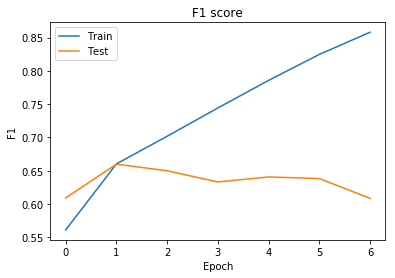

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('F1 score')
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()